# Classification using KNN

Problem for K-NN Algorithm: 
    There are are people who are tested positive for diabetes depending on their symptoms in Nairobi West Hospital. The Hospital wants to inform the patients whether they are diabetic or not depending on their symptoms. So for this problem, we have a dataset that contains multiple patient records. The Pregnancies, Glucose, Blood Pressure, Skin thickness, BMI, DiabetesPedigreeFunction and Age will  be considered for the independent variable and the Outcome is for the dependent variable.

In [12]:
# import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose, 
BloodPressure, 
SkinThickness, 
Insulin, 
BMI
<br>
columns have values 0 which does not make sense and will affect the classification , hence are missing values

In [10]:
#Replacing 0 with Nan
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To fill these NaN values, the data distribution needs to be understood

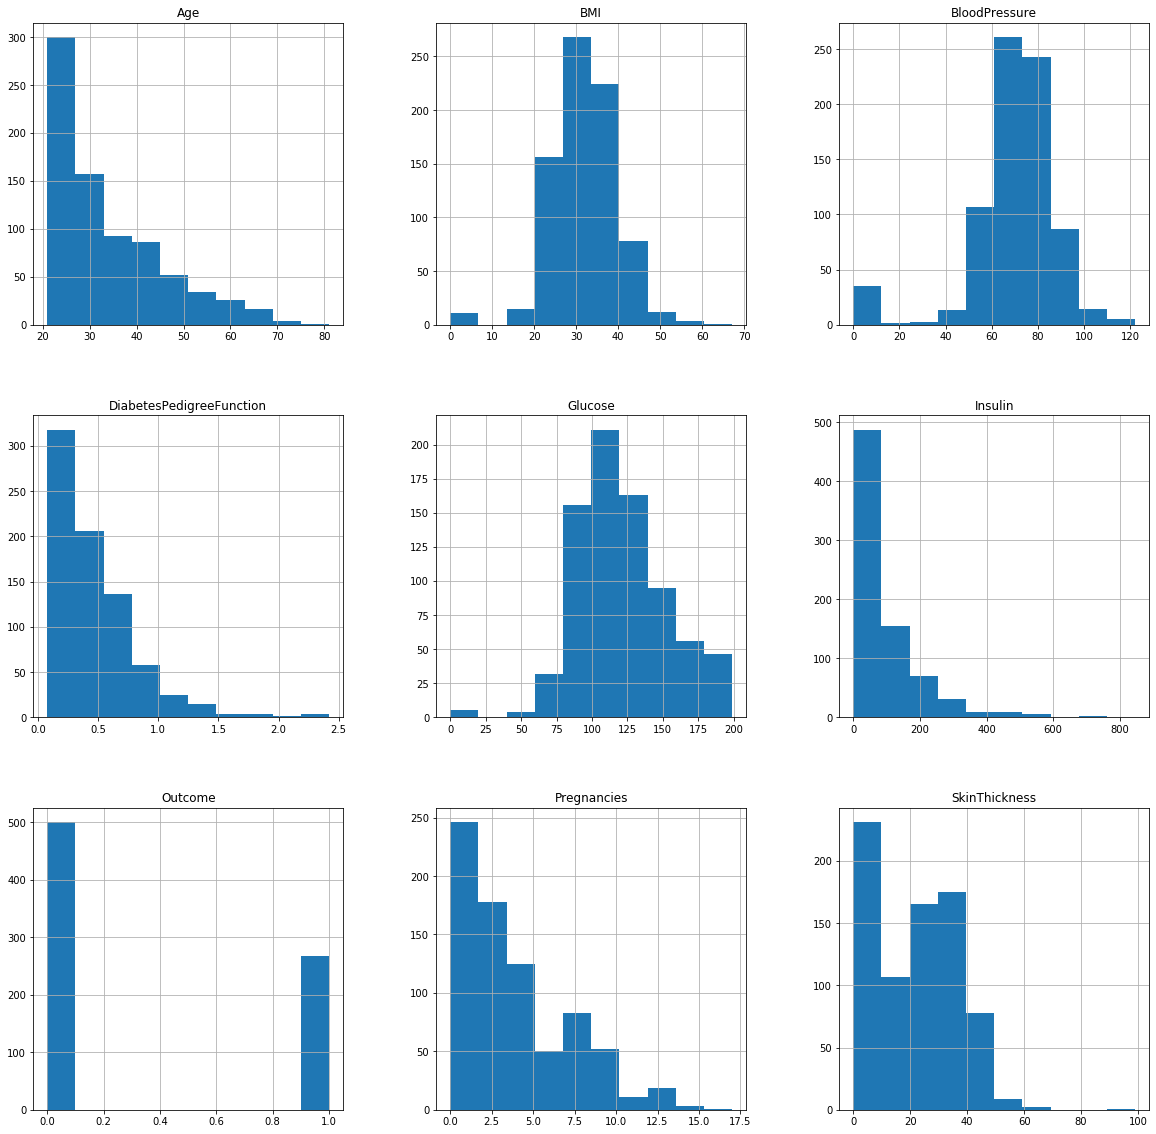

In [11]:
#Plotting Histogram
p = data.hist(figsize = (20,20))

In [15]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

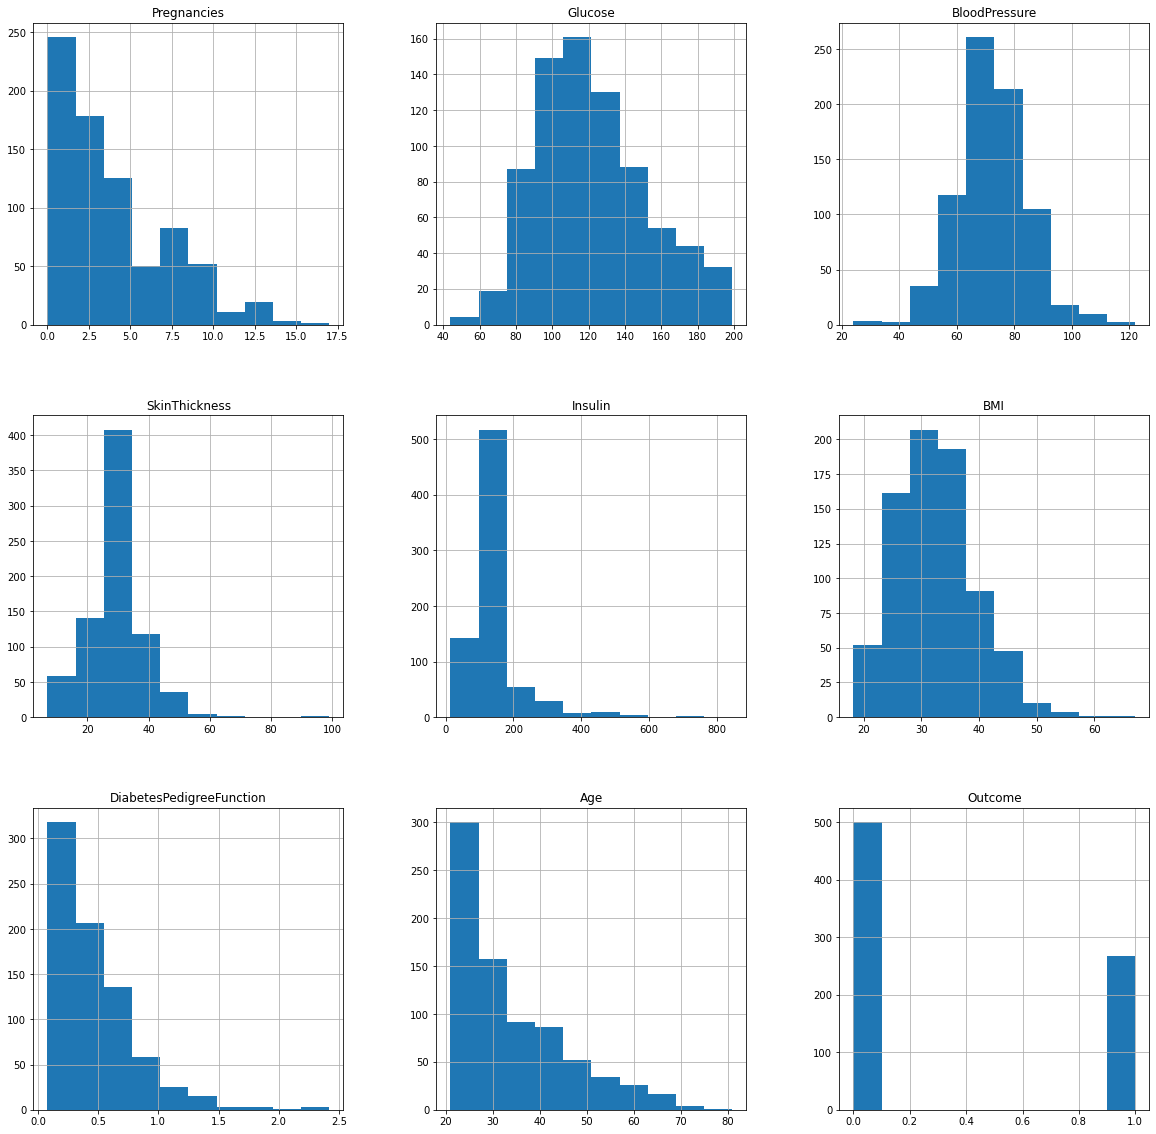

In [17]:
p = data_copy.hist(figsize = (20,20))

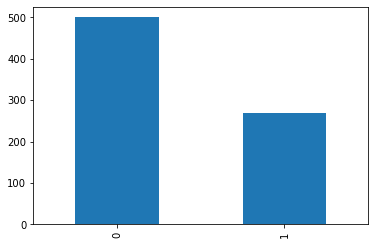

In [24]:
#Plotting a bar graph
p=data.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

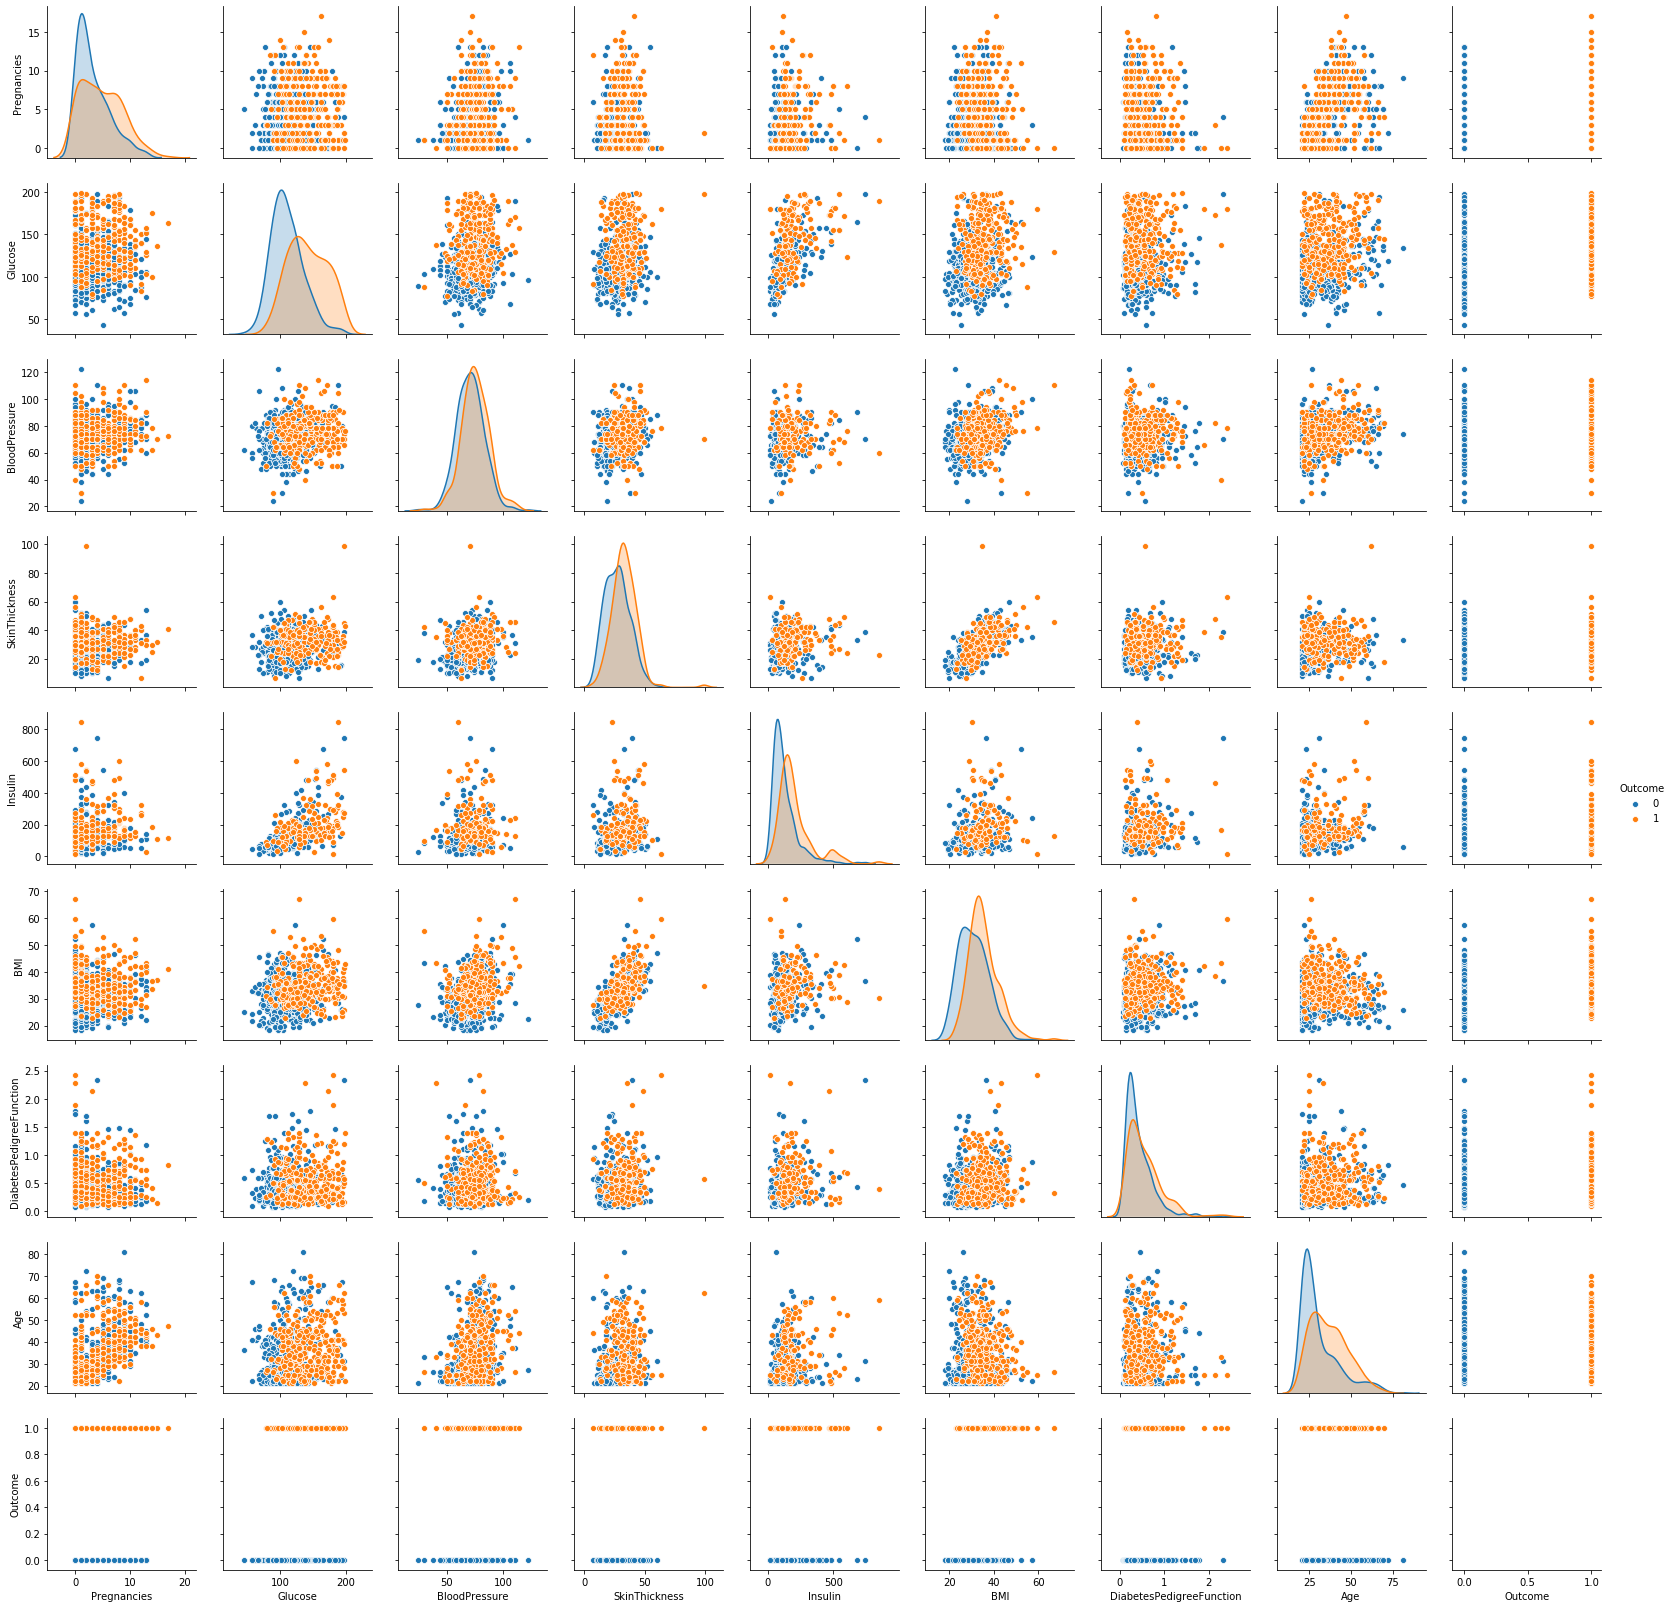

In [14]:
#plotting a pairplot
p=sns.pairplot(data_copy, hue = 'Outcome')

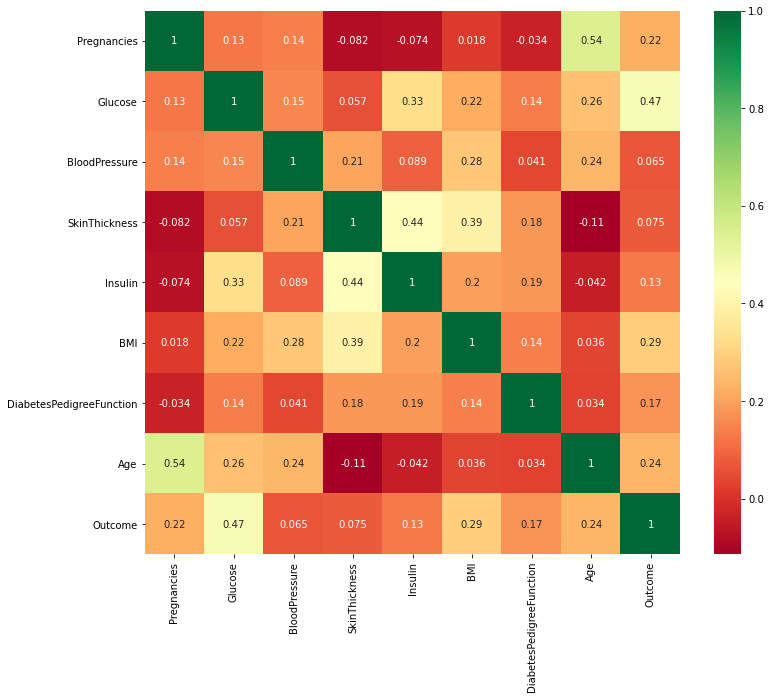

In [31]:
#heatmap for uncleaned data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

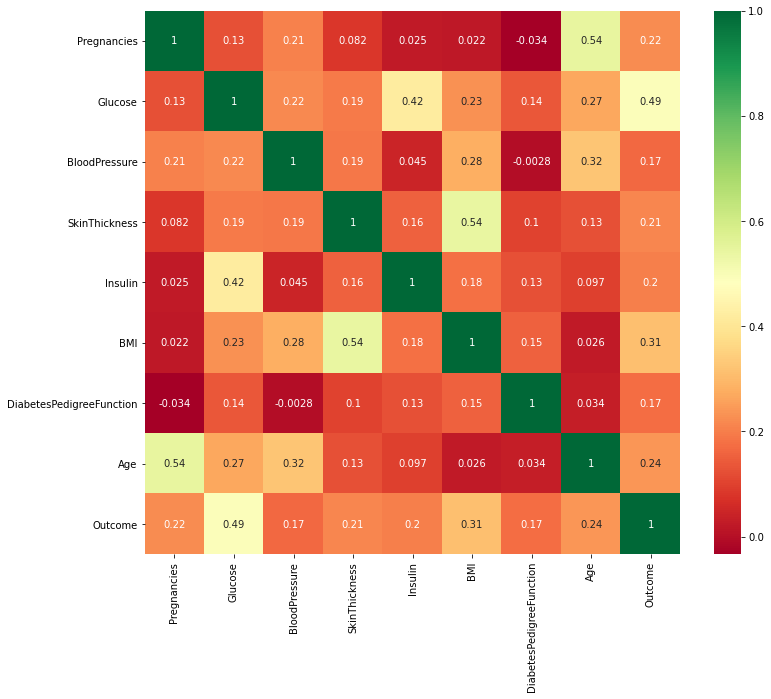

In [32]:
#heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis =1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [31]:
#independent variable
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_columns].values
#dependent variable
y = data['Outcome'].values

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 6)
classifier = KNeighborsClassifier(n_neighbors=6)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [21, 26]], dtype=int64)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [71]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 79.22 %.


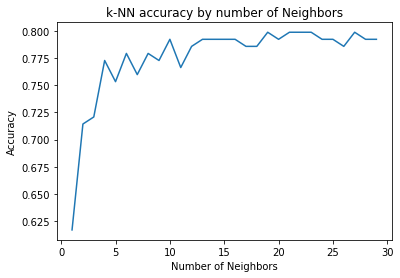

In [54]:
neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_test, y_test)
 
plt.title('k-NN accuracy by number of Neighbors')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As seen from the graph above, the accuracy is best between 20 and 25 number of neighbors

In [65]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'n_neighbors':np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 21}
0.7328990228013029


The best number of neighbors to be used between 1 and 25 is 21

In [72]:
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [73]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[97, 10],
       [21, 26]], dtype=int64)

In [74]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 79.87 %.


In [75]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

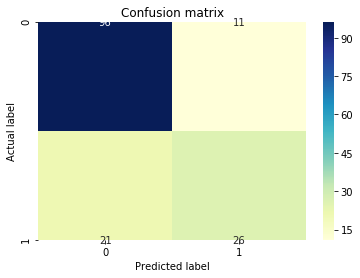

In [78]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.792208,0.702703,0.553191,0.619048,0.577778
